# Using a Tensorflow DNNClassifier to classify Titanic dataset

My focus here is just show a basic approach of a Deep Neural Classifier using Google's Open Source TensorFlow library.

The TensorFlow team developed the Estimator API to make the library more accessible to the everyday developer. This high level API provides a common interface to train(...) models, evaluate(...) models, and predict(...) outcomes of unknown cases similar to (and influenced by) the popular Sci-Kit Learn library, which is accomplished by implementing a common interface for various algorithms

### Load data after feat. engineering and cleanning data

In [3]:
import pandas as pd
import numpy as np

I did the feature engineering and cleaning step separately. If want to see more details please, see here: [ Titanic Best Working Classfier:](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier) by Sina

In [4]:
train = pd.read_csv('./data/train-ready.csv')
test = pd.read_csv('./data/test-ready.csv')

In [5]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,1,1,0,0,0,1
1,1,1,0,2,3,1,0,3
2,1,3,0,1,1,0,1,2
3,1,1,0,2,3,0,0,3
4,0,3,1,2,1,0,1,1


In [6]:
len(train)

891

### DNNClassifier using tensorFlow: a basic approach

Helper functions

In [7]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""

    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    dataset = dataset.shuffle(10).repeat().batch(batch_size)
    return dataset

In [8]:
def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)

    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    return dataset

In [9]:
y = train.pop('Survived')
X = train

#### Create the model

In [10]:
import tensorflow as tf

In [11]:
feature_columns = []

for key in X.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))

In [12]:
feature_columns

[_NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Embarked', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='IsAlone', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Title', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

Two hidden layers of 10 nodes each. The model must choose between 2 classes.

In [13]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[10, 10],
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10cb5a5f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train and evaluation the Model

In [14]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error

In [16]:
batch_size = 100
train_steps = 400

evaluations = []  
for i in range(100):  
    classifier.train(
        input_fn=lambda:train_input_fn(X, y,
                                       batch_size),
                    steps=train_steps)
    
    eval_result = classifier.evaluate(
            input_fn=lambda:eval_input_fn(X, y,batch_size)
        )
    
    evaluations.append(eval_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 63.87832, step = 1
INFO:tensorflow:global_step/sec: 439.578
INFO:tensorflow:loss = 50.117947, step = 101 (0.228 sec)
INFO:tensorflow:global_step/sec: 644.409
INFO:tensorflow:loss = 37.262917, step = 201 (0.155 sec)
INFO:tensorflow:global_step/sec: 655.445
INFO:tensorflow:loss = 44.12213, step = 301 (0.152 sec)
INFO:tensorflow:Saving checkpoints for 400 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 33.640503.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:40:19
INFO:ten

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2001 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 45.001556, step = 2001
INFO:tensorflow:global_step/sec: 459.185
INFO:tensorflow:loss = 49.87333, step = 2101 (0.219 sec)
INFO:tensorflow:global_step/sec: 641.264
INFO:tensorflow:loss = 31.809448, step = 2201 (0.156 sec)
INFO:tensorflow:global_step/sec: 616.774
INFO:tensorflow:loss = 36.92519, step = 2301 (0.162 sec)
INFO:tensorflow:Saving checkpoints for 2400 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 32.52148.
INFO:tensorf

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4001 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 44.35568, step = 4001
INFO:tensorflow:global_step/sec: 483.889
INFO:tensorflow:loss = 46.010612, step = 4101 (0.208 sec)
INFO:tensorflow:global_step/sec: 680.364
INFO:tensorflow:loss = 41.9124, step = 4201 (0.147 sec)
INFO:tensorflow:global_step/sec: 690.494
INFO:tensorflow:loss = 38.154297, step = 4301 (0.145 sec)
INFO:tensorflow:Saving checkpoints for 4400 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 29.219353.
INFO:tensorf

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6001 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 40.63156, step = 6001
INFO:tensorflow:global_step/sec: 429.429
INFO:tensorflow:loss = 47.50643, step = 6101 (0.234 sec)
INFO:tensorflow:global_step/sec: 684.089
INFO:tensorflow:loss = 34.69795, step = 6201 (0.146 sec)
INFO:tensorflow:global_step/sec: 690.699
INFO:tensorflow:loss = 35.653923, step = 6301 (0.145 sec)
INFO:tensorflow:Saving checkpoints for 6400 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 27.88933.
INFO:tensorfl

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8001 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 42.951237, step = 8001
INFO:tensorflow:global_step/sec: 436.59
INFO:tensorflow:loss = 47.717373, step = 8101 (0.230 sec)
INFO:tensorflow:global_step/sec: 642.991
INFO:tensorflow:loss = 32.42806, step = 8201 (0.155 sec)
INFO:tensorflow:global_step/sec: 655.411
INFO:tensorflow:loss = 38.9175, step = 8301 (0.153 sec)
INFO:tensorflow:Saving checkpoints for 8400 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 29.02521.
INFO:tensorflo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10001 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 40.55556, step = 10001
INFO:tensorflow:global_step/sec: 447.299
INFO:tensorflow:loss = 49.300426, step = 10101 (0.224 sec)
INFO:tensorflow:global_step/sec: 600.922
INFO:tensorflow:loss = 34.269337, step = 10201 (0.167 sec)
INFO:tensorflow:global_step/sec: 614.266
INFO:tensorflow:loss = 35.93592, step = 10301 (0.162 sec)
INFO:tensorflow:Saving checkpoints for 10400 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 27.124954.
INFO

INFO:tensorflow:Saving dict for global step 12000: accuracy = 0.8563412, accuracy_baseline = 0.6161616, auc = 0.91315943, auc_precision_recall = 0.8873321, average_loss = 0.3500488, global_step = 12000, label/mean = 0.3838384, loss = 34.65483, prediction/mean = 0.38512403
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12001 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 40.33502, step = 12001
INFO:tensorflow:global_step/sec: 463.951
INFO:tensorflow:loss = 47.660408, step = 12101 (0.216 sec)
INFO:tensorflow:global_step/sec: 683.362
INFO:tensorflow:loss = 32.89282, step = 12201 (0.146 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:41:56
INFO:tensorflow:Saving dict for global step 14000: accuracy = 0.8563412, accuracy_baseline = 0.6161616, auc = 0.9139424, auc_precision_recall = 0.88829136, average_loss = 0.34870163, global_step = 14000, label/mean = 0.3838384, loss = 34.52146, prediction/mean = 0.38516903
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14001 into /var/folders/y7/1vdd

INFO:tensorflow:Loss for final step: 24.647049.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:42:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:42:10
INFO:tensorflow:Saving dict for global step 16000: accuracy = 0.8563412, accuracy_baseline = 0.6161616, auc = 0.91468537, auc_precision_recall = 0.889215, average_loss = 0.34770796, global_step = 16000, label/mean = 0.3838384, loss = 34.423088, prediction/mean = 0.38759178
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tm

INFO:tensorflow:loss = 35.92911, step = 17801 (0.149 sec)
INFO:tensorflow:global_step/sec: 672.876
INFO:tensorflow:loss = 34.28932, step = 17901 (0.149 sec)
INFO:tensorflow:Saving checkpoints for 18000 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 26.685547.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:42:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:42:24
INFO:tensorflow:Saving dict for global step 18000: accuracy = 0.8563412, accuracy_baseline = 0.6161616, auc = 0.91502357, auc_precision_recall = 0.8895651, average_loss = 0.34672695, global_step = 18000, label/mean = 0.3838384, loss = 34.325

INFO:tensorflow:Saving checkpoints for 19601 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 39.055824, step = 19601
INFO:tensorflow:global_step/sec: 453.257
INFO:tensorflow:loss = 47.37732, step = 19701 (0.222 sec)
INFO:tensorflow:global_step/sec: 668.589
INFO:tensorflow:loss = 34.86324, step = 19801 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.581
INFO:tensorflow:loss = 33.743084, step = 19901 (0.150 sec)
INFO:tensorflow:Saving checkpoints for 20000 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 26.184578.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:42:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running loca

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-21600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21601 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 38.403267, step = 21601
INFO:tensorflow:global_step/sec: 463.755
INFO:tensorflow:loss = 43.11247, step = 21701 (0.217 sec)
INFO:tensorflow:global_step/sec: 679.458
INFO:tensorflow:loss = 32.31533, step = 21801 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.813
INFO:tensorflow:loss = 34.35773, step = 21901 (0.148 sec)
INFO:tensorflow:Saving checkpoints for 22000 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 27.200686.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-23600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23601 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 39.851467, step = 23601
INFO:tensorflow:global_step/sec: 459.956
INFO:tensorflow:loss = 46.102585, step = 23701 (0.219 sec)
INFO:tensorflow:global_step/sec: 670.534
INFO:tensorflow:loss = 33.431763, step = 23801 (0.149 sec)
INFO:tensorflow:global_step/sec: 676.438
INFO:tensorflow:loss = 33.88792, step = 23901 (0.148 sec)
INFO:tensorflow:Saving checkpoints for 24000 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 25.172531.
INF

INFO:tensorflow:Saving dict for global step 25600: accuracy = 0.85858583, accuracy_baseline = 0.6161616, auc = 0.9170927, auc_precision_recall = 0.8932364, average_loss = 0.3431731, global_step = 25600, label/mean = 0.3838384, loss = 33.974136, prediction/mean = 0.38532084
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-25600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25601 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 40.230064, step = 25601
INFO:tensorflow:global_step/sec: 473.754
INFO:tensorflow:loss = 47.20732, step = 25701 (0.212 sec)
INFO:tensorflow:global_step/sec: 673.796
INFO:tensorflow:loss = 34.826004, step = 25801 (0.149 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-27600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:43:32
INFO:tensorflow:Saving dict for global step 27600: accuracy = 0.8597082, accuracy_baseline = 0.6161616, auc = 0.9173191, auc_precision_recall = 0.8933369, average_loss = 0.34259945, global_step = 27600, label/mean = 0.3838384, loss = 33.917343, prediction/mean = 0.38543493
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-27600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 27601 into /var/folders/y7/1vdd

INFO:tensorflow:Saving checkpoints for 29600 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 27.13853.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:43:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-29600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:43:46
INFO:tensorflow:Saving dict for global step 29600: accuracy = 0.8597082, accuracy_baseline = 0.6161616, auc = 0.91781175, auc_precision_recall = 0.89412475, average_loss = 0.34201622, global_step = 29600, label/mean = 0.3838384, loss = 33.859604, prediction/mean = 0.38538912
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:t

INFO:tensorflow:global_step/sec: 427.625
INFO:tensorflow:loss = 44.48473, step = 31301 (0.235 sec)
INFO:tensorflow:global_step/sec: 638.248
INFO:tensorflow:loss = 31.892117, step = 31401 (0.157 sec)
INFO:tensorflow:global_step/sec: 599.531
INFO:tensorflow:loss = 33.532967, step = 31501 (0.167 sec)
INFO:tensorflow:Saving checkpoints for 31600 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 26.645235.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:44:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-31600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:44:01
INFO:tensorflow:Saving dict for global step 31600: accuracy = 0.8597082, accuracy_baseline = 0.6161

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 33201 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 39.434307, step = 33201
INFO:tensorflow:global_step/sec: 460.441
INFO:tensorflow:loss = 45.3015, step = 33301 (0.218 sec)
INFO:tensorflow:global_step/sec: 679.63
INFO:tensorflow:loss = 33.990677, step = 33401 (0.147 sec)
INFO:tensorflow:global_step/sec: 663.016
INFO:tensorflow:loss = 33.1967, step = 33501 (0.151 sec)
INFO:tensorflow:Saving checkpoints for 33600 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 25.7094.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-19-02:44:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-35200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 35201 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 39.729748, step = 35201
INFO:tensorflow:global_step/sec: 436.197
INFO:tensorflow:loss = 45.842964, step = 35301 (0.230 sec)
INFO:tensorflow:global_step/sec: 630.107
INFO:tensorflow:loss = 34.730152, step = 35401 (0.159 sec)
INFO:tensorflow:global_step/sec: 651.725
INFO:tensorflow:loss = 34.861073, step = 35501 (0.153 sec)
INFO:tensorflow:Saving checkpoints for 35600 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:Loss for final step: 26.23965.
INF

INFO:tensorflow:Saving dict for global step 37200: accuracy = 0.8597082, accuracy_baseline = 0.6161616, auc = 0.91823244, auc_precision_recall = 0.89349985, average_loss = 0.34050328, global_step = 37200, label/mean = 0.3838384, loss = 33.709824, prediction/mean = 0.38502908
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-37200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 37201 into /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt.
INFO:tensorflow:loss = 40.118942, step = 37201
INFO:tensorflow:global_step/sec: 454.095
INFO:tensorflow:loss = 46.723118, step = 37301 (0.221 sec)
INFO:tensorflow:global_step/sec: 643.132
INFO:tensorflow:loss = 36.31805, step = 37401 (0.156 sec

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-39200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-19-02:44:55
INFO:tensorflow:Saving dict for global step 39200: accuracy = 0.8597082, accuracy_baseline = 0.6161616, auc = 0.9183364, auc_precision_recall = 0.89367074, average_loss = 0.3401696, global_step = 39200, label/mean = 0.3838384, loss = 33.676792, prediction/mean = 0.38513407
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-39200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 39201 into /var/folders/y7/1vdd

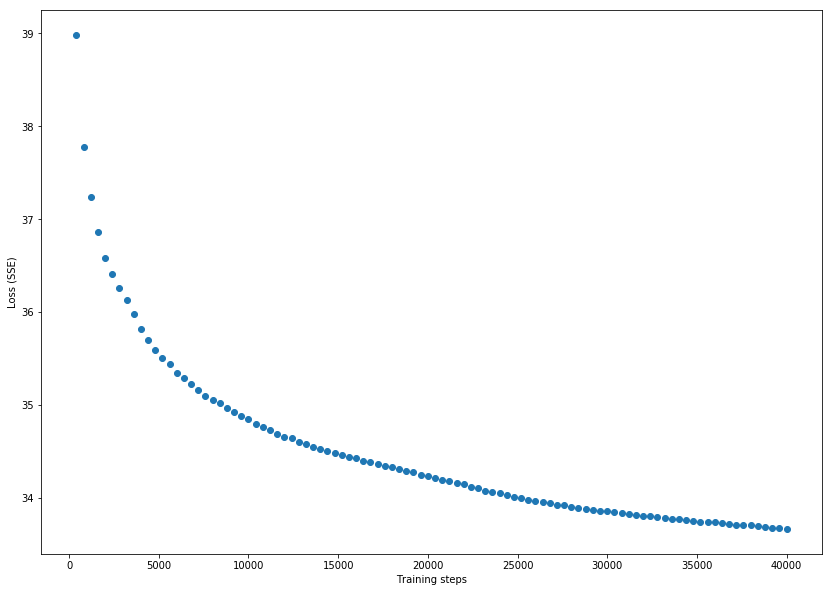

In [18]:
import matplotlib.pyplot as plt  
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps')  
plt.ylabel('Loss (SSE)')  
plt.show() 

#### Generate predictions from the model

In [19]:
predictions = classifier.predict(
    input_fn=lambda:eval_input_fn(test,labels=None,
    batch_size=batch_size))

In [20]:
results = list(predictions)

def x(res,j):
    class_id = res[j]['class_ids'][0]
    probability = int(results[i]['probabilities'][class_id] *100)

    if int(class_id) == 0:
        return ('%s%% probalitity to %s' % (probability,'Not survive'))
    else:
        return ('%s%% probalitity to %s' % (probability,'Survive!'))

print ('Predictions for 10 first records on test(dataset):')

for i in range(0,10):    
    print (x(results,i))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/1vddc8q51zq_q_dc0gw581480000gn/T/tmpnlu4xvj1/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions for 10 first records on test(dataset):
99% probalitity to Not survive
71% probalitity to Not survive
99% probalitity to Not survive
84% probalitity to Not survive
72% probalitity to Survive!
87% probalitity to Not survive
82% probalitity to Survive!
96% probalitity to Not survive
84% probalitity to Survive!
99% probalitity to Not survive


#### Generate the csv to submit. 

In [21]:
len(results)

418

In [22]:
train.tail(1)

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
890,3,1,1,0,2,1,1


In [23]:
passengers = {}
i = 892
for x in results:
    passengers[i] = int(x['class_ids'][0])
    i+=1

In [24]:
import csv
csvfile = './submissions.csv'
with open(csvfile, 'w') as f:
    outcsv = csv.writer(f, delimiter=',')
    header = ['PassengerId','Survived']
    outcsv.writerow(header)
    for k,v in passengers.items():
        outcsv.writerow([k,v])

In [25]:
submissions = pd.read_csv(csvfile)
submissions.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
